## 1. Etiquetamos y guardamos nuestro Dataset

In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
from pydub import AudioSegment
import os
import matplotlib.patches as mpatches
from matplotlib.font_manager import FontProperties
from Data_Paths_Audio import *

/home/jose/src/TFG/AudioForgeryDetection/tfg/lib/python3.10/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


Definimos las etiquetas, headers y rutas

In [2]:
folder_paths = [ORIGINAL_DATASET_PATH, COPY_MOVE_DATASET_PATH, SPLICING_DATASET_PATH]

# Label lists
forgery_category_label = ["Original_Audio", "Copy_Move_Audio", "Splicing_Audio"]
is_forgered_label = ["Original_Audio", "Forgered_Audio"]

# Header columns of the .csv
headers = ["audio_path", "audio_name", "is_forgered_index", "is_forgered_category", "forgery_type_index", "forgery_type_category", "duration"]

Métodos auxiliares para la asignación de etiquetas.

In [3]:
# Return the index for the forgeryCategory type and the string associated
def getForgeryType(index):
    forgery_type_index = index
    forgery_type_category = forgery_category_label[forgery_type_index]
    return forgery_type_index, forgery_type_category

# Return the index for the isForgered type and the string associated
def getIsForgered(forgery_type_index):
    is_forgered_index = (0 if forgery_type_index == 0 else 1)
    is_forgered_category = is_forgered_label[is_forgered_index]
    return is_forgered_index, is_forgered_category

# Return audio duration
def get_audio_duration(audio_file_path):
    audio = AudioSegment.from_file(audio_file_path)
    return round(len(audio) / 1000)  # Duration in seconds

# Write the row to the file labeled_dataset.csv
def write(writer, file_path, file_name, is_forgered_index, is_forgered_category, forgery_type_index, forgery_type_category, duration):
    writer.writerow([
        file_path,
        file_name, 
        is_forgered_index, 
        is_forgered_category, 
        forgery_type_index, 
        forgery_type_category,
        duration
    ])
          

Escribimos nuestro CSV.

In [4]:
# Load paths of the audios from my dataset
with open(LABELS_DATASET_PATH, 'w', newline='') as csvfile:
    # Write headers in the csv file
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(i for i in headers)
    
    # Travel through all folders of the dataset
    for index, folder in enumerate(folder_paths):        
        for root, dirs, files in os.walk(folder):

            # Travel through all the files in each folder
            for file in files:
                if file.endswith(".WAV"):
                    file_path = os.path.join(root, file)
                    file_name, _ = os.path.splitext(file)

                    forgery_type_index, forgery_type_category = getForgeryType(index)
                    is_forgered_index, is_forgered_category = getIsForgered(forgery_type_index)
                    
                    duration = get_audio_duration(file_path)
                    
                    write(writer, file_path, file_name, is_forgered_index, is_forgered_category, forgery_type_index, forgery_type_category, duration)
                

Cargamos el dataset en un dataframe.

In [5]:
# Load the data from CSV to a Dataframe
df = pd.read_csv(LABELS_DATASET_PATH)

## 2. Tamaño del Dataset

Colores para graficar nuestro tamaño de datos

In [6]:
# Define colors for the plots
colors_forgery = ['orange', 'green', 'lightblue']
colors_is_forgered = ['lightgreen', 'purple']

#### 2.1. Gráfica para ``forgery_category_label``

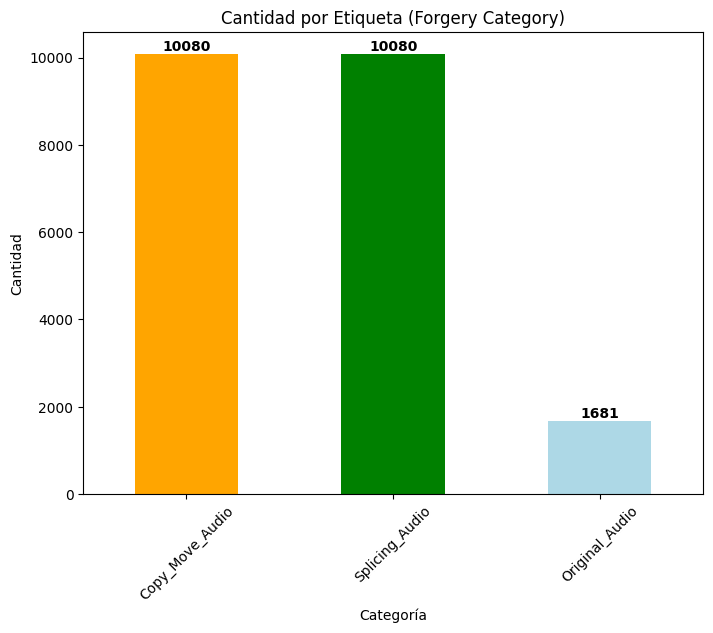

In [7]:
# Plot for the forgery_category_label
plt.figure(figsize=(8, 6))
forgery_counts = df['forgery_type_category'].value_counts()
forgery_counts.plot(kind='bar', color=colors_forgery)

# Añadimos el número exacto de muestras
for i, count in enumerate(forgery_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom', fontweight='bold')

plt.title('Cantidad por Etiqueta (Forgery Category)')
plt.xlabel('Categoría')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

#### 2.1. Gráfica para ``is_forgered_category``

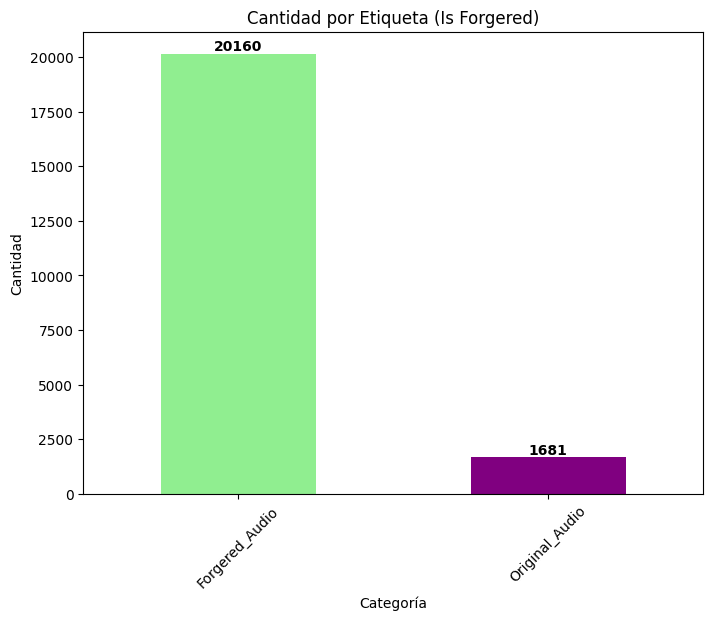

In [8]:
# Plot for the is_forgered_label
plt.figure(figsize=(8, 6))
is_forgered_counts = df['is_forgered_category'].value_counts()
is_forgered_counts.plot(kind='bar', color=colors_is_forgered)

# Añadimos el número exacto de muestras
for i, count in enumerate(is_forgered_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom', fontweight='bold')

plt.title('Cantidad por Etiqueta (Is Forgered)')
plt.xlabel('Categoría')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

## 3. Duraciones de los audios.

In [9]:
# Get the number of audios for each duration group
duration_counts = df['duration'].value_counts().sort_index()


# Colors for each section of the plot
colors = (['tab:orange', 'tab:purple', 'tab:green', 'tab:red', 'tab:blue', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan'])
colors.extend(['xkcd:baby poop green', 'xkcd:blood orange', 'xkcd:dark pastel green', 'xkcd:dusty purple'])
colors.extend(['gold', 'lime', 'tomato', 'turquoise', 'violet', 'wheat', 'yellowgreen'])



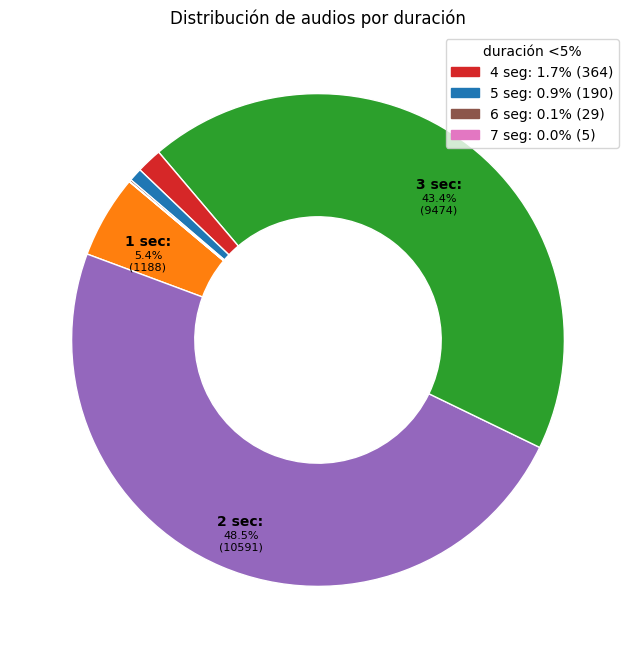

In [10]:
# Find the bigger section
max_percentage_section = duration_counts.idxmax()

# Create the donut chart
plt.figure(figsize=(8, 8))
pie = plt.pie(
    duration_counts,
    colors=colors, 
    startangle=140,
    wedgeprops=dict(width=0.5, edgecolor='white'))

# Add annotations
threshold = 5
legend_labels = []
legend_handles = []
total = sum(duration_counts)

# Include the text
for i, (percentage, label) in enumerate(zip(duration_counts / total * 100, duration_counts.index)):
    if percentage < threshold:
        # Append values for the legend
        legend_labels.append(f'{label} seg: {percentage:.1f}% ({duration_counts[label]})')
        # Add colors
        legend_handles.append(mpatches.Patch(color=colors[i], label=f'{label}:'))
        continue

    # Calculate angle for annotation position
    angle = (pie[0][i].theta2 - pie[0][i].theta1) / 2 + pie[0][i].theta1

    # Calculate coordinates for annotation position
    x = 0.8 * pie[0][i].r * np.cos(np.deg2rad(angle))
    y = 0.8 * pie[0][i].r * np.sin(np.deg2rad(angle))
    
    # Add annotation at the center of the section
    plt.text(x, y, f'{label} sec:', ha='center', va='center', fontweight= 'bold')
    plt.text(x+0.001, y-0.08, f'{percentage:.1f}%\n({duration_counts[label]})', ha='center', va='center', fontsize=8)

# Add legend for annotations below threshold
plt.legend(handles=legend_handles, labels=legend_labels, loc='upper right', title="duración <5%")

# Add title
plt.title('Distribución de audios por duración')

plt.show()

